<a href="https://colab.research.google.com/github/alexrafkin/unemployment_time_series_analysis/blob/main/Unemployment_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://drive.google.com/file/d/19LMGSXD8OPVuopiug_lPiiNhL_8cDl2p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

unemployment = pd.read_csv(path)
unemployment.info()
unemployment.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    877 non-null    object 
 1   UNRATE  877 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [ ]:
unemployment.tail(20)

,DATE,UNRATE
857,2019-06-01,3.6
858,2019-07-01,3.6
859,2019-08-01,3.7
860,2019-09-01,3.5
861,2019-10-01,3.6
862,2019-11-01,3.6
863,2019-12-01,3.6
864,2020-01-01,3.5
865,2020-02-01,3.5
866,2020-03-01,4.4


In [ ]:
unemployment=unemployment.loc[:866]

#Basic Plots

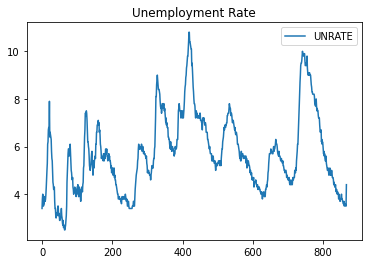

In [ ]:
unemployment.plot()
plt.title('Unemployment Rate')
plt.show()

The x-axis doesn't make a lot of sense in terms of scale.

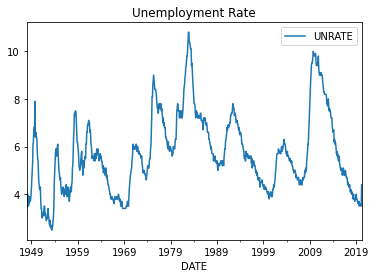

In [ ]:
unemployment.index = pd.to_datetime(unemployment.DATE)
unemployment.plot()
plt.title('Unemployment Rate')
plt.show()

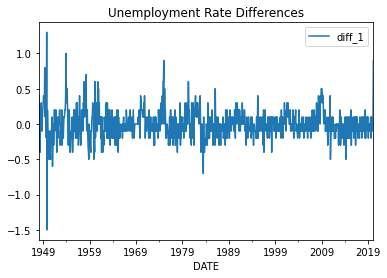

In [ ]:
unemployment['diff_1'] = unemployment.UNRATE - unemployment.UNRATE.shift()
unemployment.plot(y='diff_1')
plt.title('Unemployment Rate Differences')
plt.show()

Month to month differences seem relatively steady, other than when COVID hit from March to April 2020 this feels like a stable dataset. Lets look at the second difference anyway.

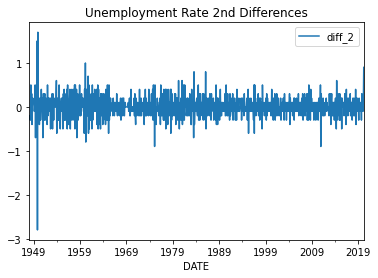

In [ ]:
unemployment['diff_2'] = unemployment.diff_1 - unemployment.diff_1.shift()
unemployment.plot(y='diff_2')
plt.title('Unemployment Rate 2nd Differences')
plt.show()

Marginally more stationary? 2020 still super volatile.

#PACF

Text(0.5, 1.0, 'Unemployment PACF')

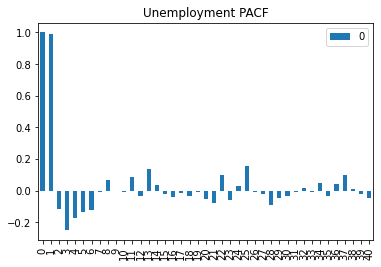

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(unemployment.UNRATE))
x_acf.plot(kind='bar')
plt.title("Unemployment PACF")

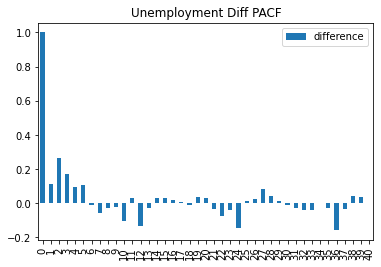

In [ ]:
x_acf = pd.DataFrame(pacf(unemployment.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Diff PACF")
plt.legend(['difference'])

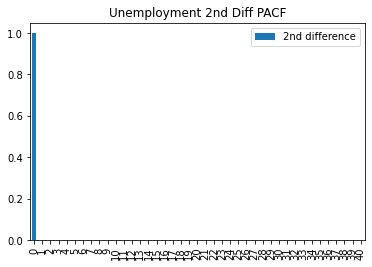

In [ ]:
x_acf = pd.DataFrame(pacf(unemployment.diff_2[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment 2nd Diff PACF")
plt.legend(['2nd difference'])

It seems like the original data has one strong autocorrelation, and the differences have none.

#ARIMA Modeling

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
for i in [[1,1,0],[12,1,0],[6,1,0],[3,1,0]]:
  model = ARIMA(unemployment.UNRATE, order=i)
  model_fit = model.fit()
  print(model_fit.summary())
  print('Residuals Description')
  print(model_fit.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 128.284
Method:                       css-mle   S.D. of innovations              0.209
Date:                Mon, 01 Mar 2021   AIC                           -250.568
Time:                        16:34:25   BIC                           -236.277
Sample:                    02-01-1948   HQIC                          -245.099
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0013      0.008      0.168      0.866      -0.014       0.017
ar.L1.D.UNRATE     0.1130      0.034      3.306      0.001       0.046       0.180
                                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(6, 1, 0)   Log Likelihood                 182.484
Method:                       css-mle   S.D. of innovations              0.196
Date:                Mon, 01 Mar 2021   AIC                           -348.969
Time:                        16:34:37   BIC                           -310.858
Sample:                    02-01-1948   HQIC                          -334.383
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0030      0.015      0.198      0.843      -0.027       0.033
ar.L1.D.UNRATE     0.0096      0.034      0.278      0.781      -0.058       0.077
ar.L2.D.UNRATE     0.2173      0.034

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 174.040
Method:                       css-mle   S.D. of innovations              0.198
Date:                Mon, 01 Mar 2021   AIC                           -338.079
Time:                        16:34:37   BIC                           -314.260
Sample:                    02-01-1948   HQIC                          -328.963
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0026      0.013      0.204      0.838      -0.022       0.027
ar.L1.D.UNRATE     0.0342      0.034      1.009      0.313      -0.032       0.101
ar.L2.D.UNRATE     0.2594      0.033

(1,0,1) seems to be the best performing model - it has low p-values, and the closest log likelihood to 0. Lets look at the residuals.

In [ ]:
  model = ARIMA(unemployment.UNRATE, order=(1,1,1))
  model_fit = model.fit()
  print(model_fit.summary())
  print('Residuals Description')
  print(model_fit.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  866
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 161.734
Method:                       css-mle   S.D. of innovations              0.201
Date:                Mon, 01 Mar 2021   AIC                           -315.467
Time:                        16:36:16   BIC                           -296.412
Sample:                    02-01-1948   HQIC                          -308.175
                         - 03-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0029      0.015      0.194      0.846      -0.026       0.032
ar.L1.D.UNRATE     0.8707      0.030     29.315      0.000       0.812       0.929
ma.L1.D.UNRATE    -0.7185      0.038

Text(0.5, 1.0, 'Histogram of Residuals')

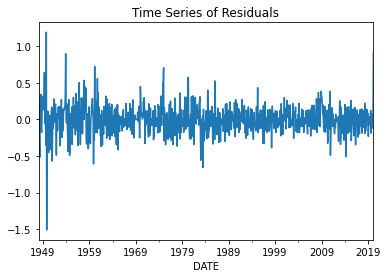

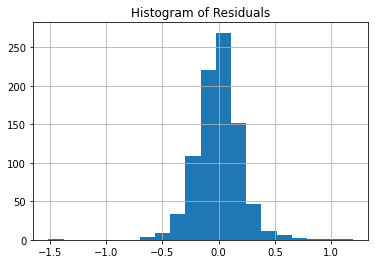

In [ ]:
import pandas as pd
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

No trends, seems (relatively) normally distributed - lets look at AIC.

In [ ]:
import math
for x in [993.867, 986.424, 994.240, 992.512]:
  print('There is a {} probability that you lost less information than the ARIMA 101 model.'.format(math.exp((985.284 - x)/2)))

There is a 0.013684383319753933 probability that you lost less information than the ARIMA 101 model.
There is a 0.565525438699541 probability that you lost less information than the ARIMA 101 model.
There is a 0.011356102662921714 probability that you lost less information than the ARIMA 101 model.
There is a 0.02694385560539588 probability that you lost less information than the ARIMA 101 model.


Generally it looks like our ARMA(1,1) model performed the best, although it wasn't super clear. It had p-values that indicated significance, no trends in and normally distributed residuals, smallest abs val log likelihood and AIC.